In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from itertools import combinations
from itertools import product
from scipy.stats import chi2_contingency

In [47]:
data=pd.read_csv("healthcare_noshows_appt.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [48]:
data.duplicated().sum()

0

In [49]:
data.drop_duplicates(inplace=True)

In [50]:
data.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [51]:
data.shape

(106987, 15)

In [52]:
data.nunique()

,0
PatientId,60270
AppointmentID,106987
Gender,2
ScheduledDay,110
AppointmentDay,27
Age,102
Neighbourhood,81
Scholarship,2
Hipertension,2
Diabetes,2


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [54]:
data.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


Univariate Analysis

In [55]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [56]:
num_cols = [col for col in data.columns if data[col].dtypes=="int64" or  data[col].dtypes=="float64"]
num_cols

['PatientId', 'AppointmentID', 'Age', 'Date.diff']

Numerical Coloumn Analysis

In [57]:
data["PatientId"].value_counts()

,count
PatientId,
8.221459e+14,88
9.963767e+10,84
2.688613e+13,70
3.353478e+13,65
2.584244e+11,62
...,...
4.299165e+11,1
9.996585e+14,1
7.843458e+14,1


<Axes: xlabel='PatientId', ylabel='Count'>

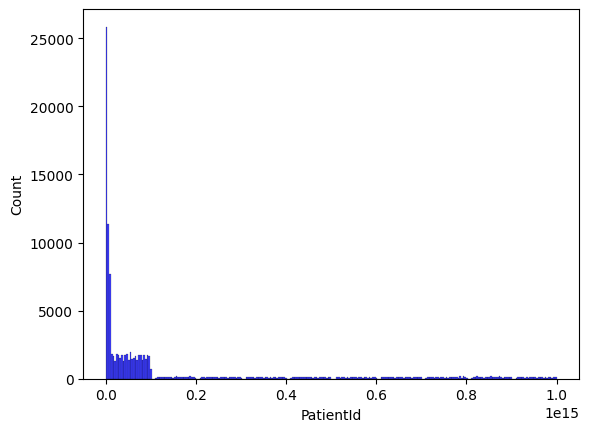

In [58]:
sns.histplot(data=data,x="PatientId",color="blue")

<Axes: xlabel='Age', ylabel='Count'>

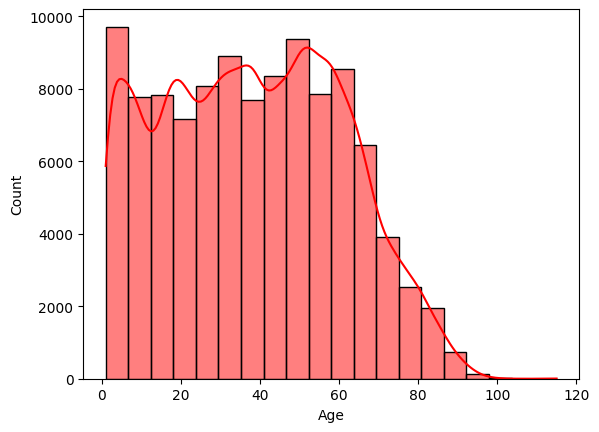

In [59]:
sns.histplot(data=data,x="Age",bins=20,color="red",kde=True)

<Axes: xlabel='AppointmentID', ylabel='Count'>

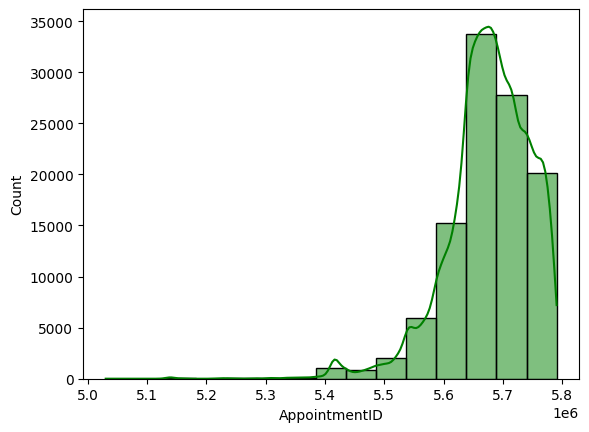

In [60]:
sns.histplot(data=data,x="AppointmentID",bins=15,color="green",kde=True)

<ipython-input-61-37097a46c686>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="Date.diff",palette=["pink","green"])
<ipython-input-61-37097a46c686>:1: UserWarning: 
The palette list has fewer values (2) than needed (131) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data,x="Date.diff",palette=["pink","green"])


<Axes: xlabel='Date.diff', ylabel='count'>

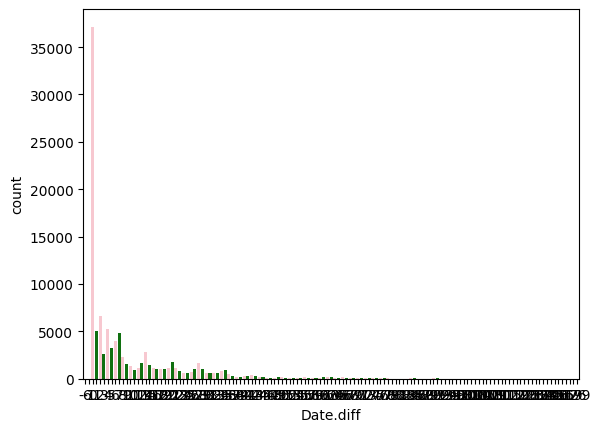

In [61]:
sns.countplot(data=data,x="Date.diff",palette=["pink","green"])

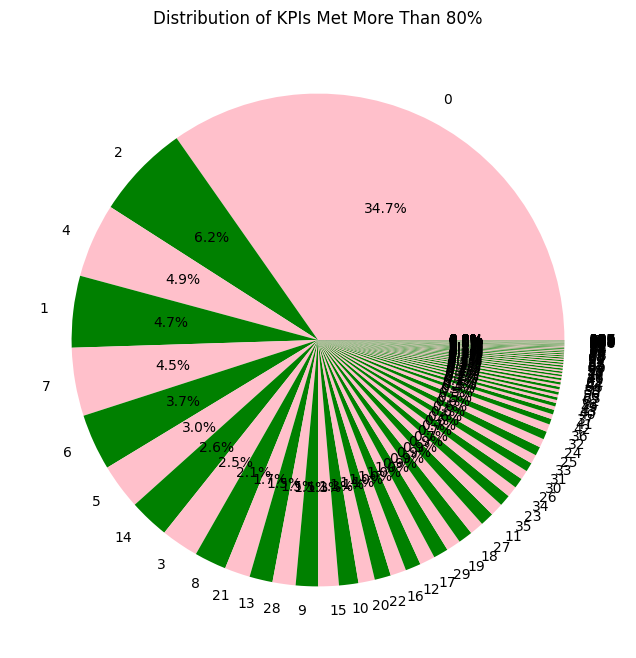

In [62]:
counts = data["Date.diff"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["pink", "green"])
plt.title('Distribution of KPIs Met More Than 80%')
plt.show()

In [63]:
cat_cols = [col for col in data.columns if data[col].dtypes=="object"]
cat_cols

['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']

In [64]:
data.Gender.value_counts()

,count
Gender,
F,70118
M,36869


<Axes: xlabel='count', ylabel='Gender'>

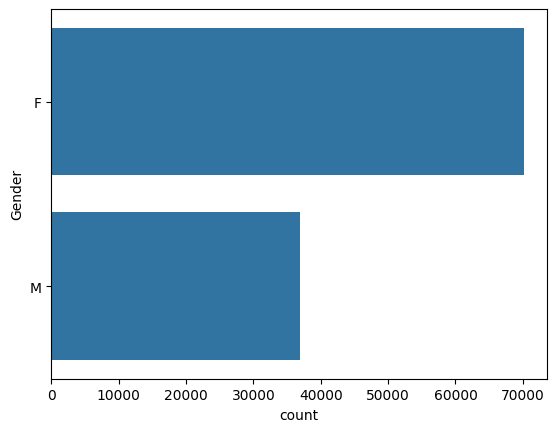

In [65]:
sns.countplot(data=data,y="Gender")

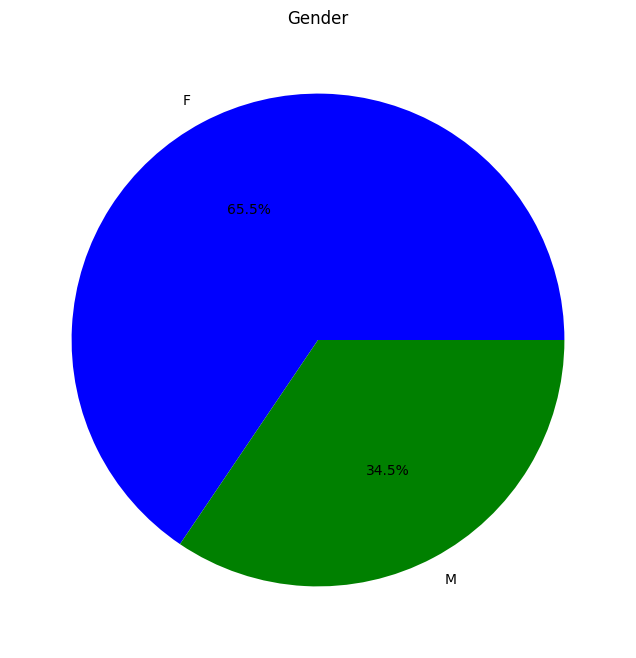

In [66]:
counts = data["Gender"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["blue", "green","yellow"])
plt.title('Gender')
plt.show()

<Axes: xlabel='ScheduledDay', ylabel='count'>

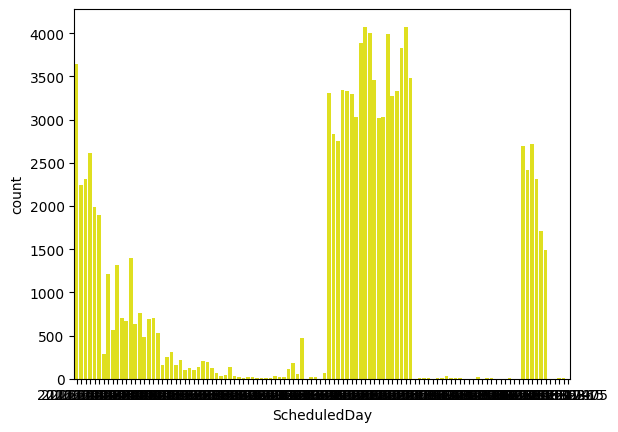

In [67]:
sns.countplot(data=data,x="ScheduledDay",color="yellow")

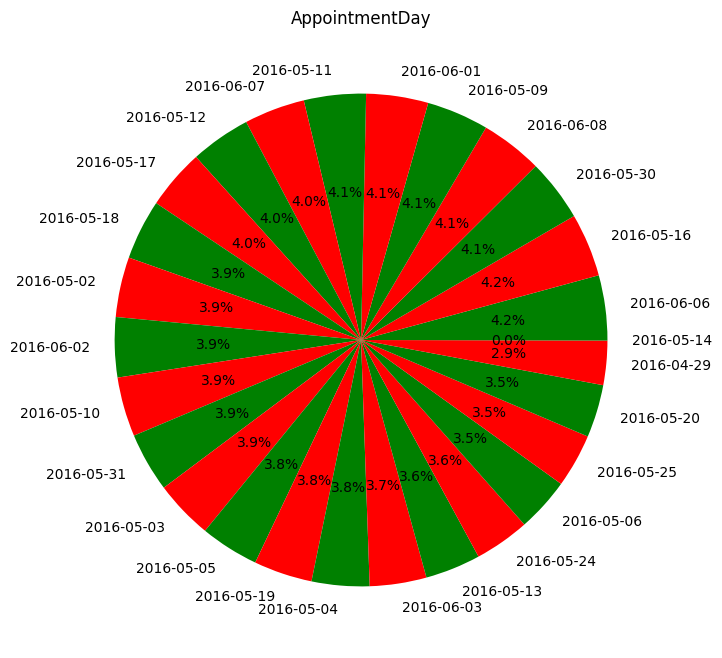

In [68]:
counts = data["AppointmentDay"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["green", "red"])
plt.title('AppointmentDay')
plt.show()

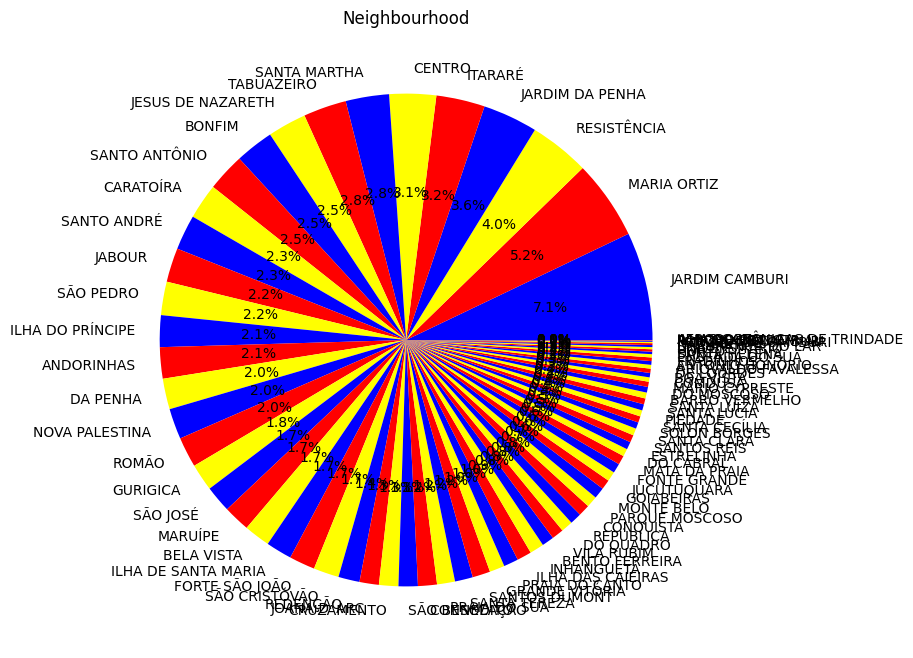

In [69]:
counts = data["Neighbourhood"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["blue", "red","yellow"])
plt.title('Neighbourhood')
plt.show()

In [70]:
si1 = SimpleImputer(strategy="median")
imputed_values = si1.fit_transform(data[["Age"]])
data["Age"] = imputed_values

In [71]:
mode = data['AppointmentDay'].mode()[0]
data['AppointmentDay'] = data['AppointmentDay'].fillna(mode)

# INSIGHTS

(i):Numerical Variable

Age: The age distribution reveals that most patients fall within a specific age range.There are outliers, such as age values that might be too high or too low (e.g., age 0).Elderly patients might exhibit different no-show behaviors compared to younger ones.

Patient ID & Appointment ID: These columns serve as unique identifiers and do not contribute to behavioral patterns.However, analyzing the number of appointments per patient could reveal repeat no-show behavior.

Date Difference (Time Gap Between Booking & Appointment):The distribution of appointment scheduling gaps shows whether longer wait times contribute to no-shows.If patients book appointments too far in advance, they may be more likely to forget or miss them.


(ii) Categorical Variables

Gender:The dataset reveals whether gender has an impact on appointment adherence.If there is a significant imbalance in no-show rates between genders, hospitals may need to tailor appointment reminders differently.

Day of the Week (Appointment Day):Analyzing appointment days helps identify which days have higher no-show rates.If specific weekdays have a significantly higher number of missed appointments, scheduling adjustments could improve efficiency.

Medical Conditions (e.g., Diabetes, Hypertension, Alcoholism, etc.):
Patients with certain medical conditions may have higher or lower no-show rates.Understanding these patterns could help in customizing follow-ups for high-risk patients.

No-Show Status:The primary variable of interest indicates whether a patient attended the appointment or not.A frequency analysis helps understand the overall no-show percentage, which is crucial for predicting patient behavior

Bivariate Analysis

In [72]:
data.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


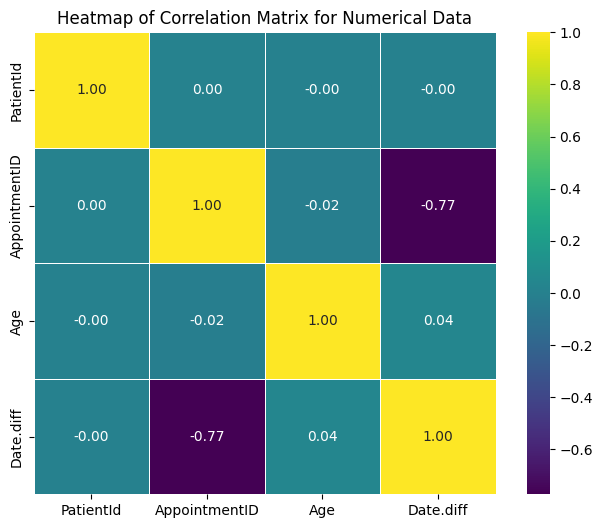

In [73]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()

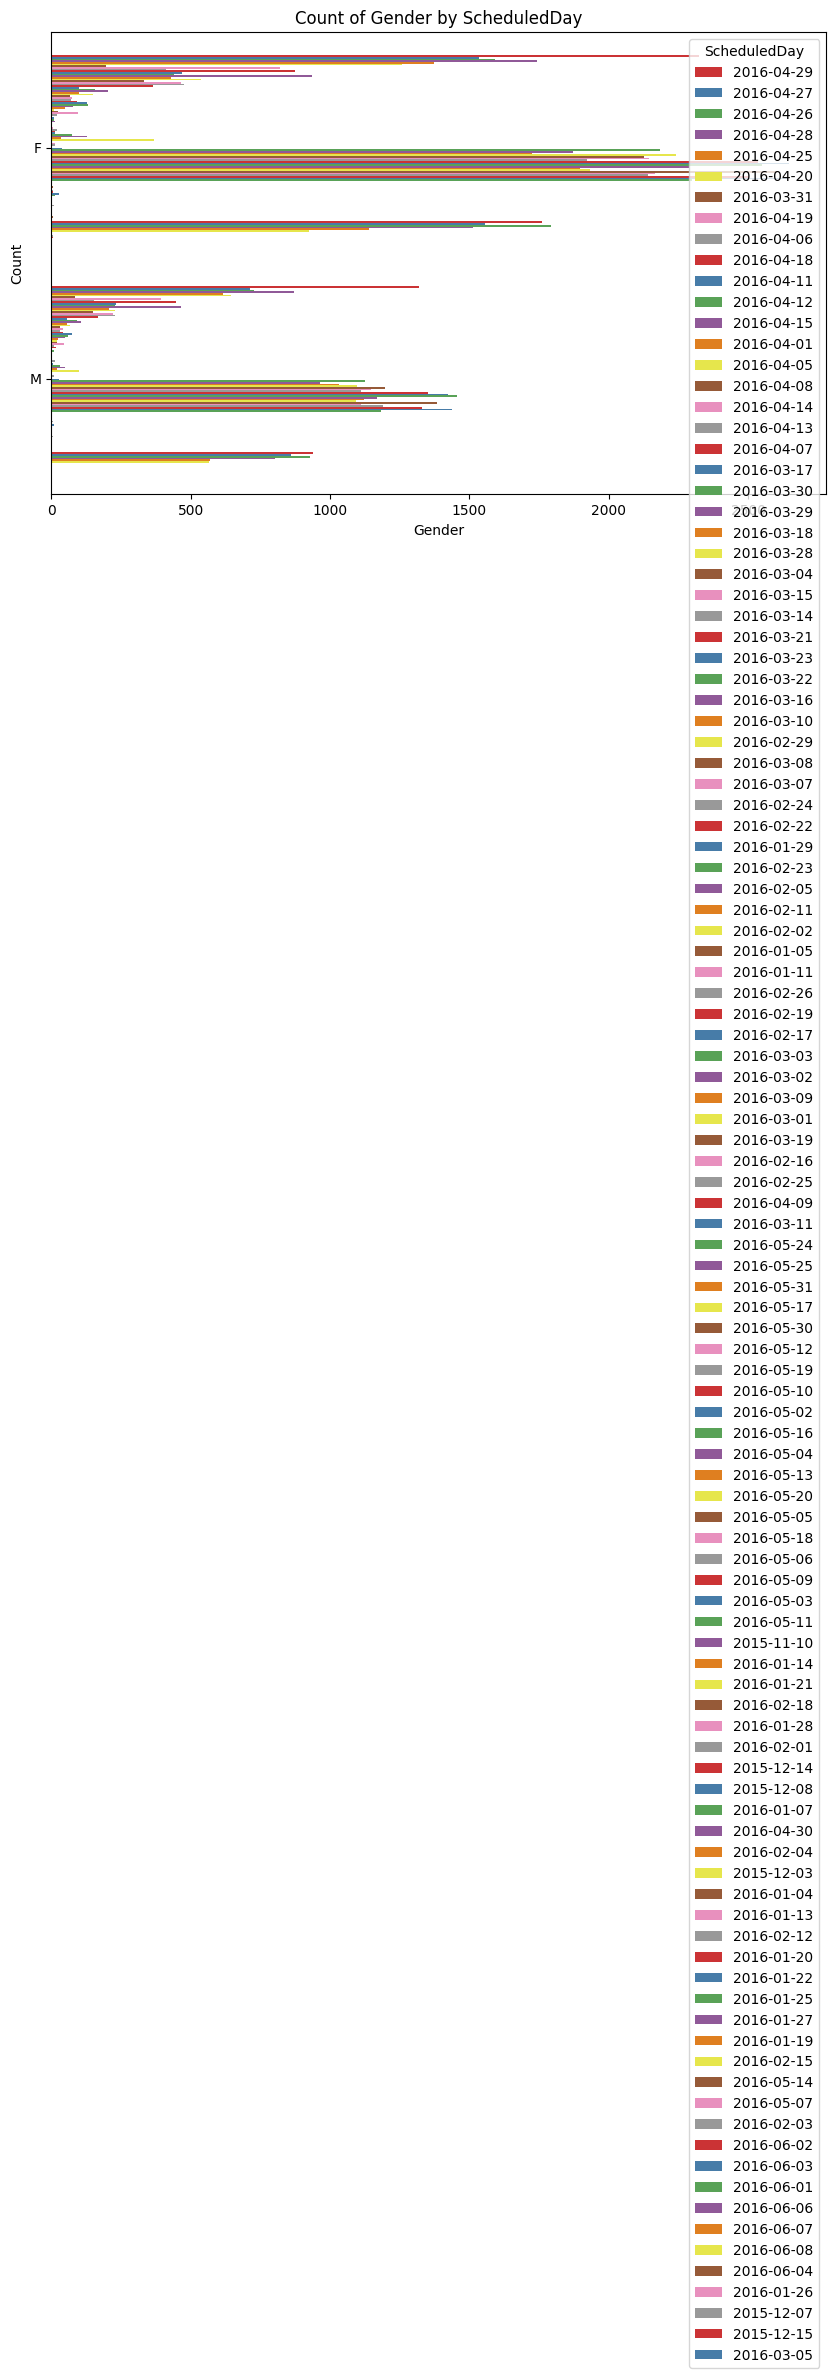

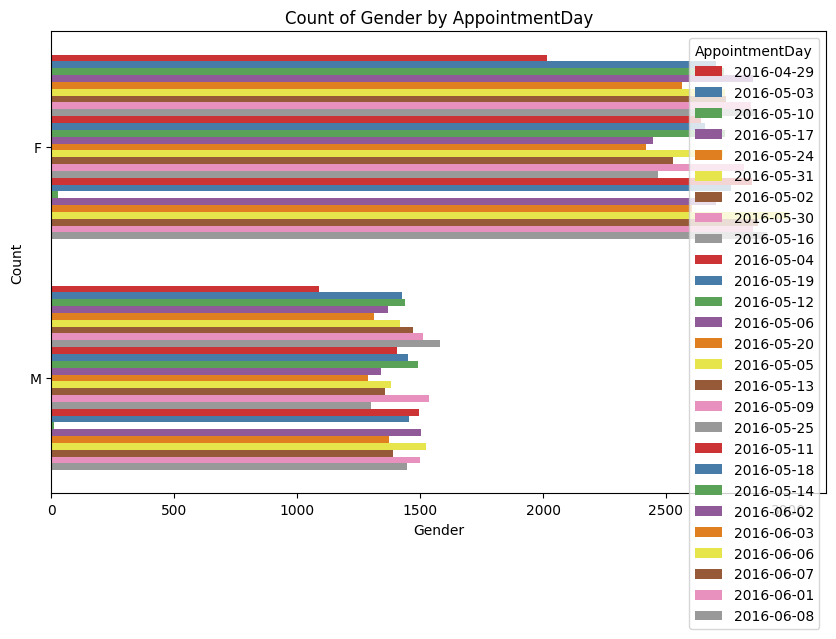

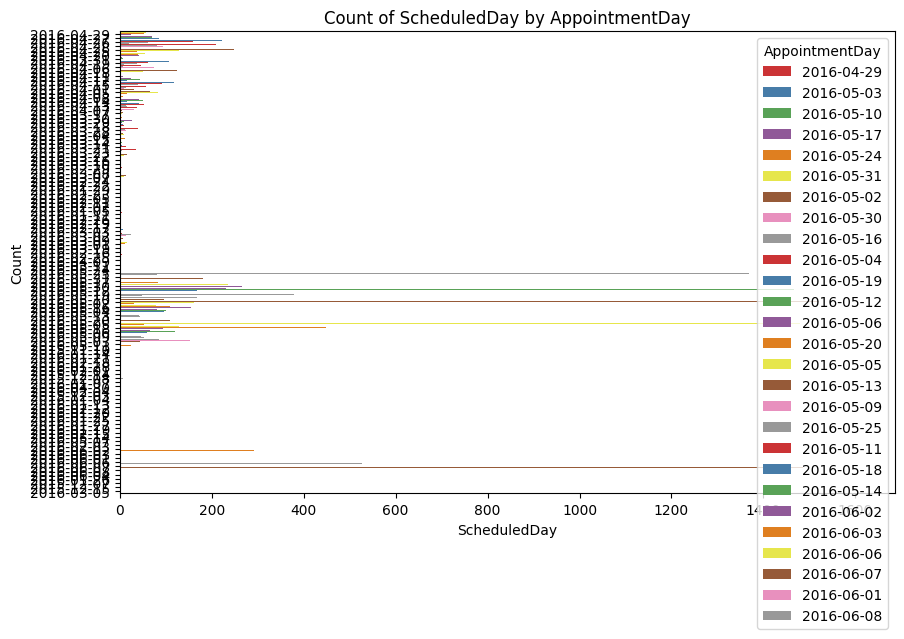

In [74]:
cat_col = cat_cols.copy()
cat_col.remove("Neighbourhood")
for col1, col2 in combinations(cat_col, 2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=col1, hue=col2, palette='Set1')
    plt.title(f'Count of {col1} by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.show()

In [75]:
for col1, col2 in combinations(cat_cols, 2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")

Chi-Square Test between Gender and ScheduledDay:
Chi2 Statistic: 261.1845, p-value: 0.0000, Degrees of Freedom: 109
Chi-Square Test between Gender and AppointmentDay:
Chi2 Statistic: 34.0878, p-value: 0.1328, Degrees of Freedom: 26
Chi-Square Test between Gender and Neighbourhood:
Chi2 Statistic: 348.6766, p-value: 0.0000, Degrees of Freedom: 80
Chi-Square Test between ScheduledDay and AppointmentDay:
Chi2 Statistic: 507664.9464, p-value: 0.0000, Degrees of Freedom: 2834
Chi-Square Test between ScheduledDay and Neighbourhood:
Chi2 Statistic: 53442.4280, p-value: 0.0000, Degrees of Freedom: 8720
Chi-Square Test between AppointmentDay and Neighbourhood:
Chi2 Statistic: 5421.1450, p-value: 0.0000, Degrees of Freedom: 2080


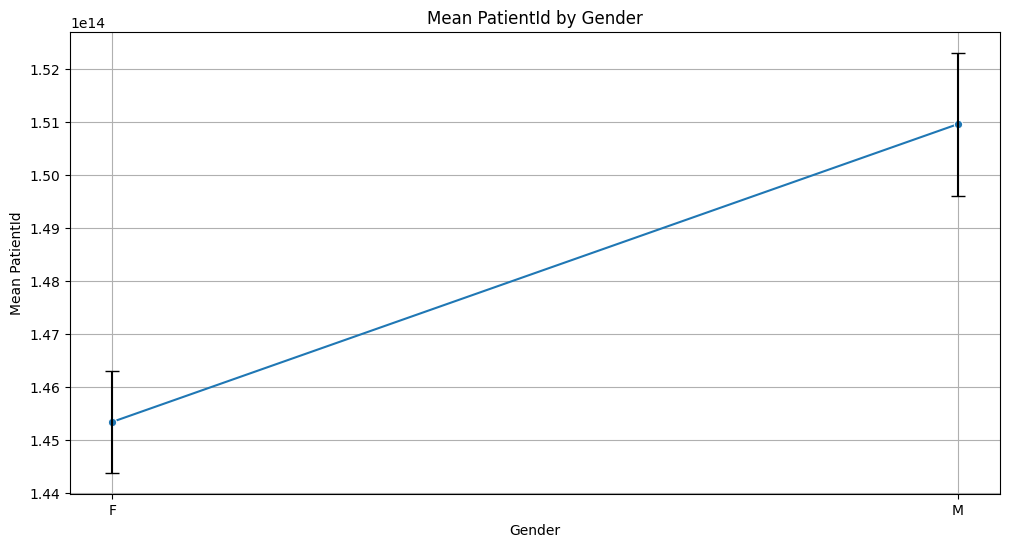

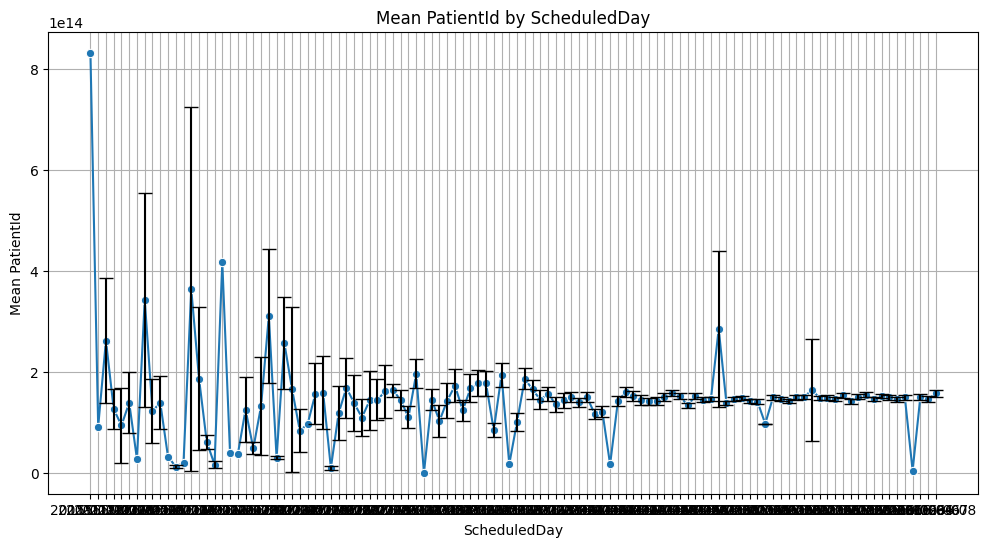

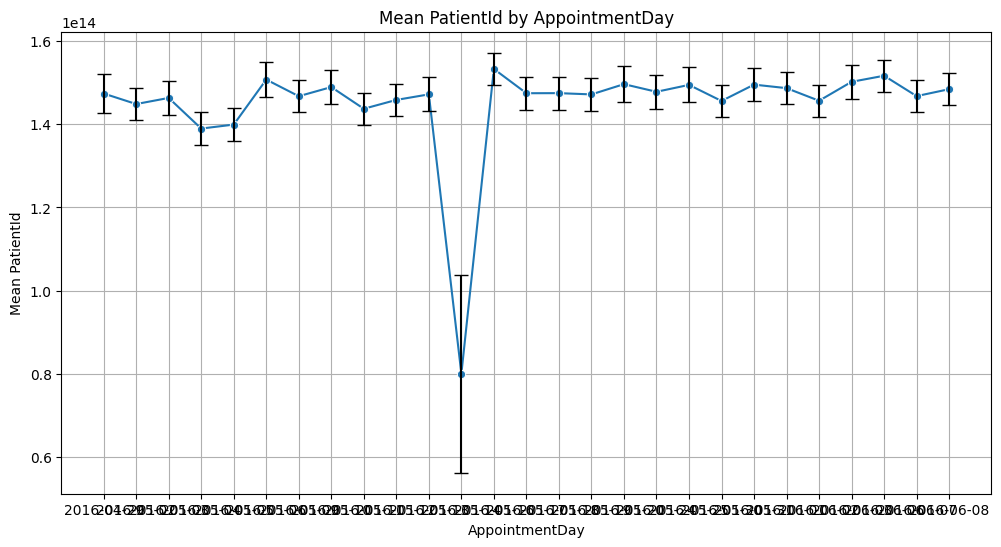

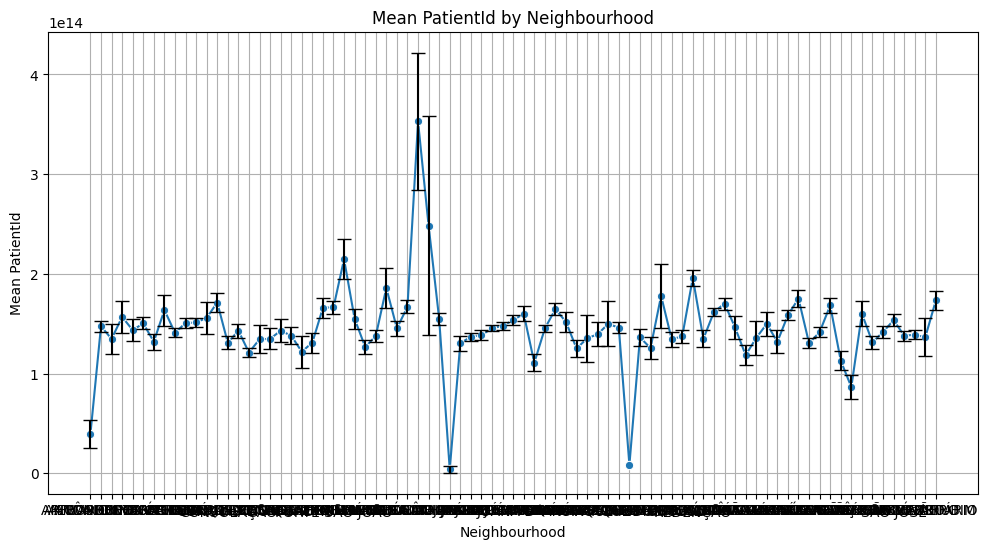

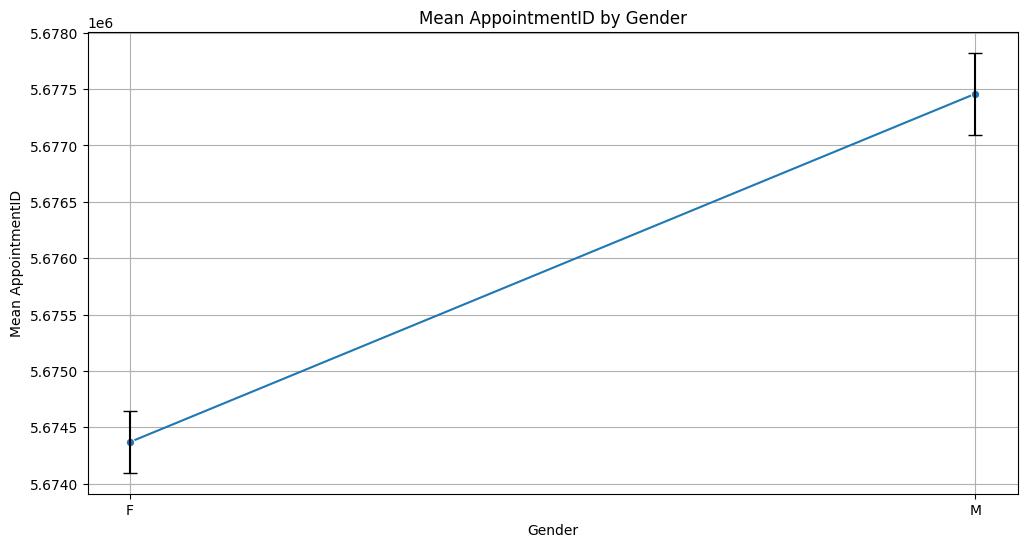

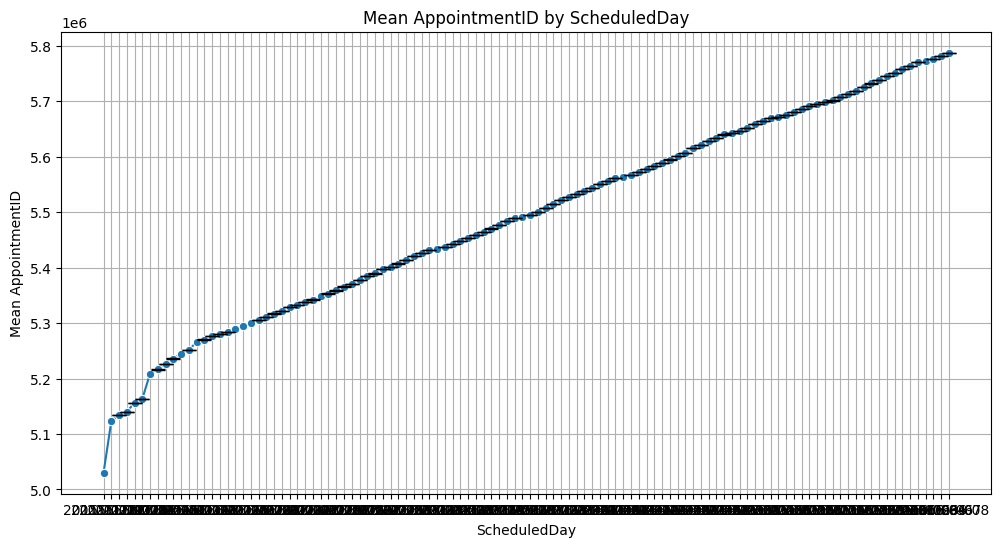

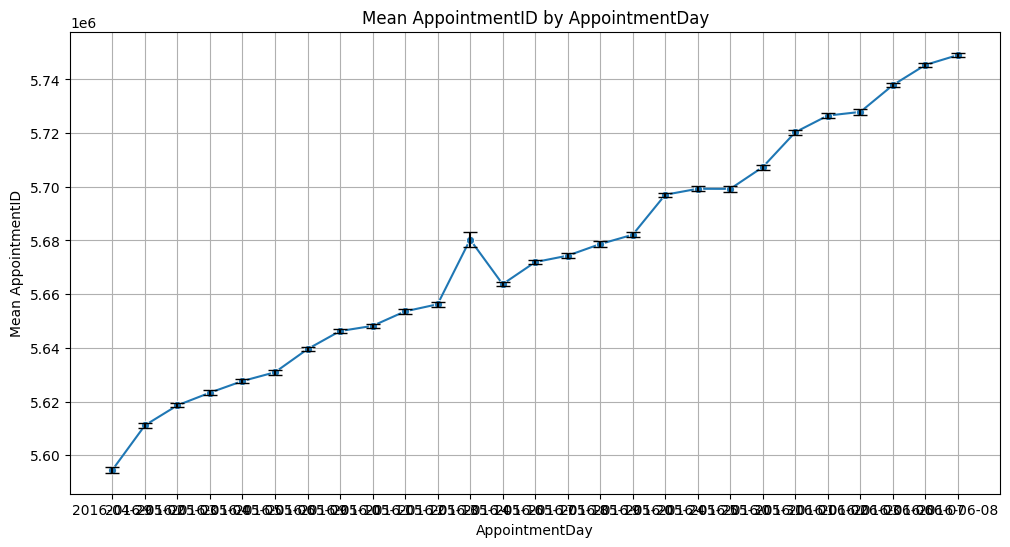

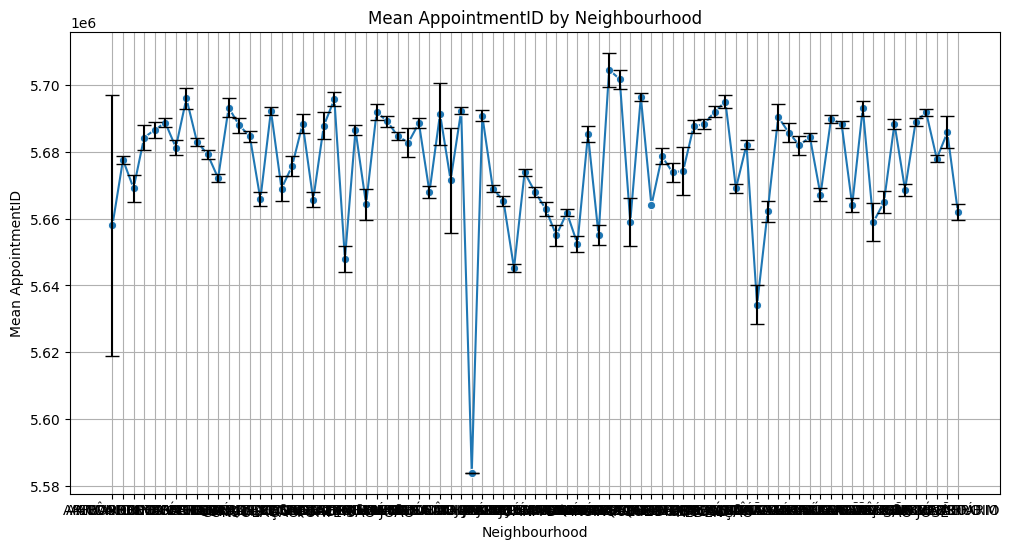

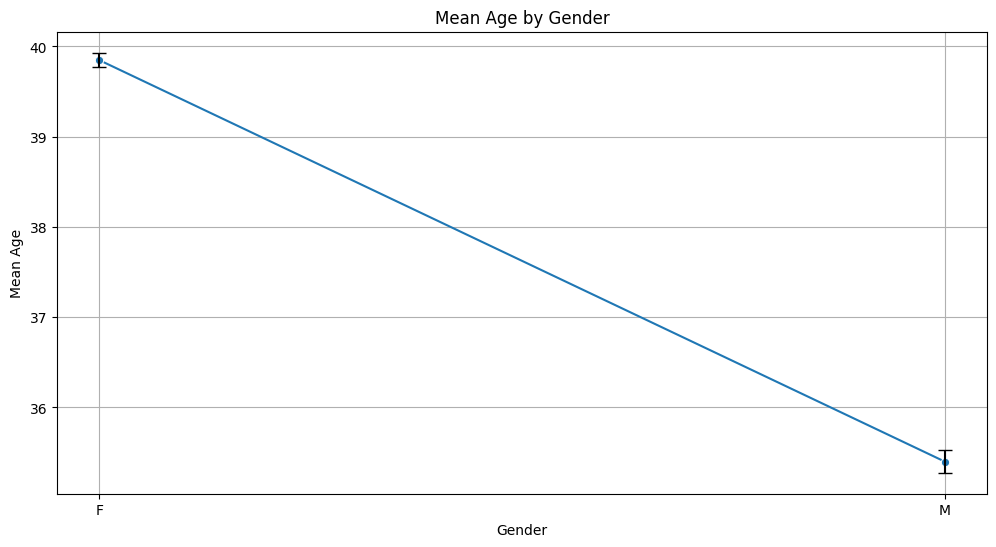

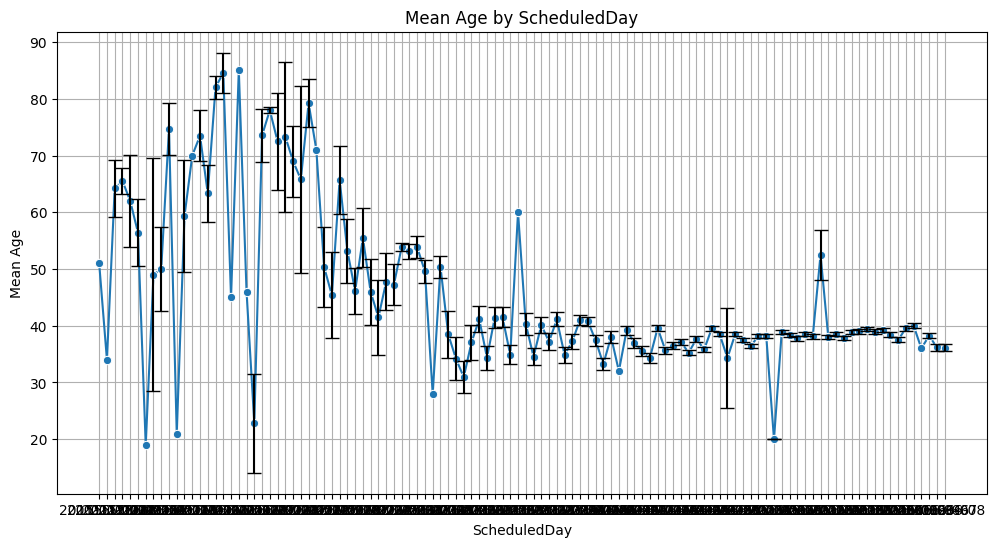

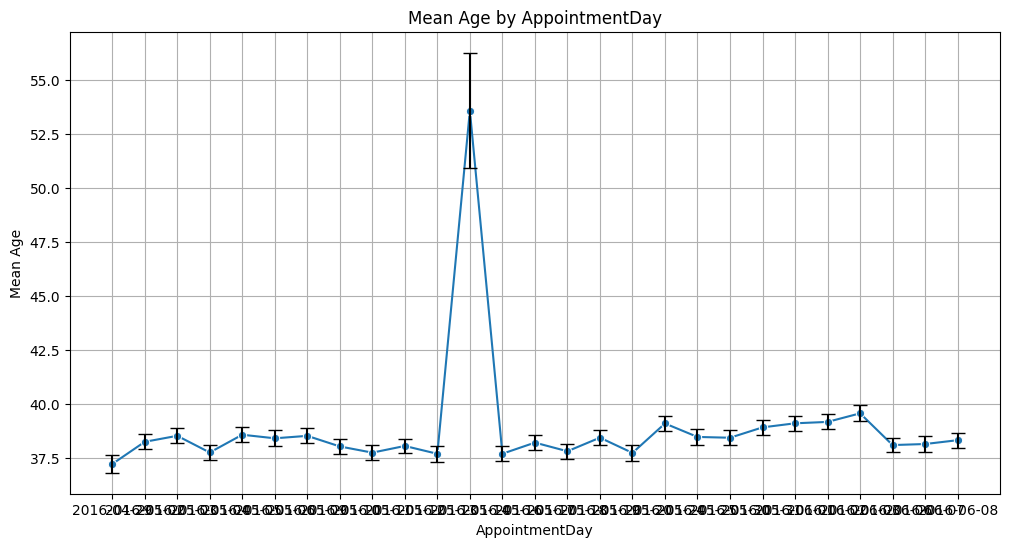

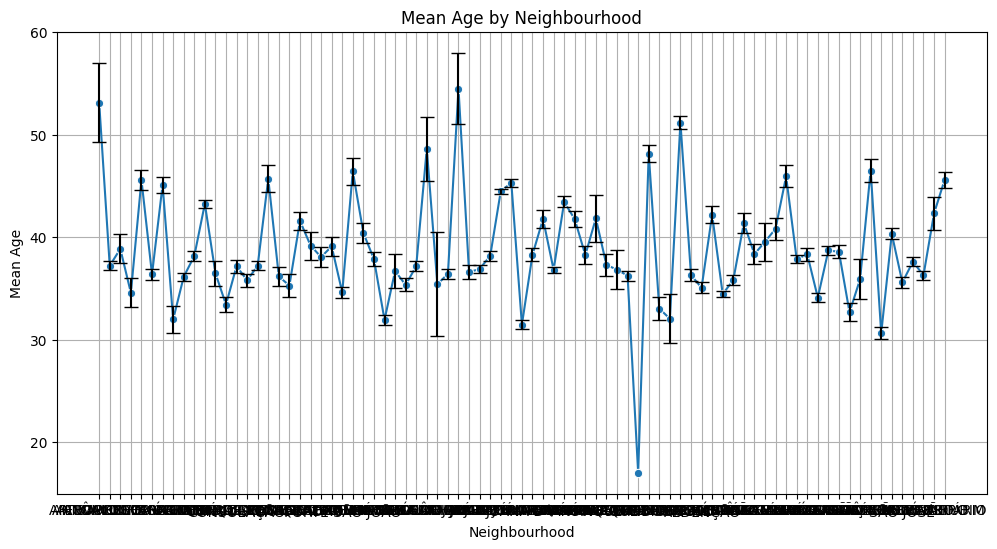

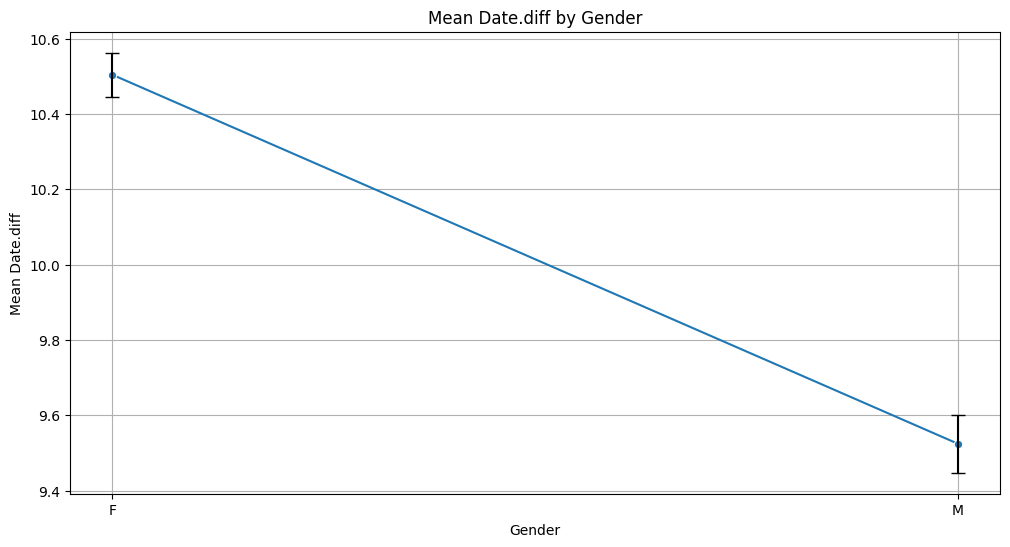

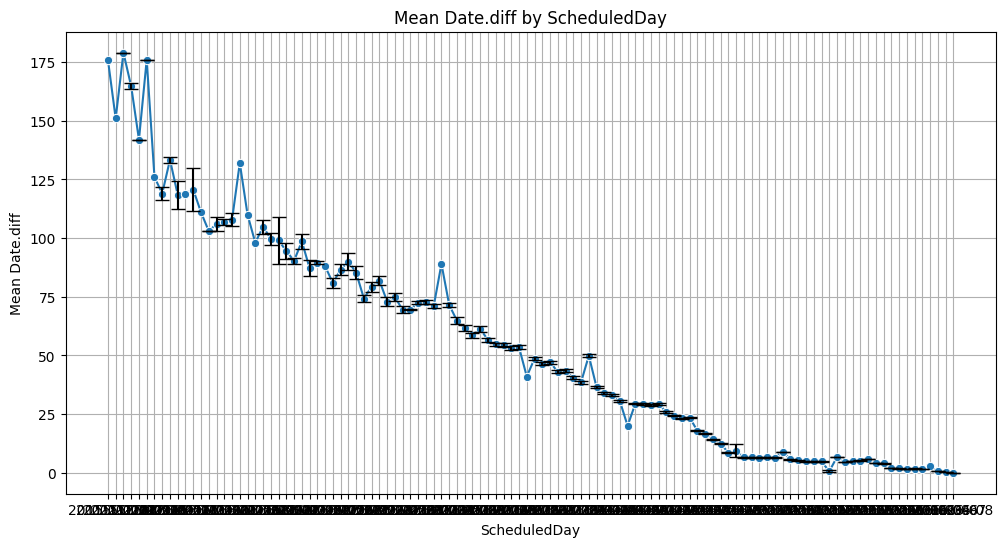

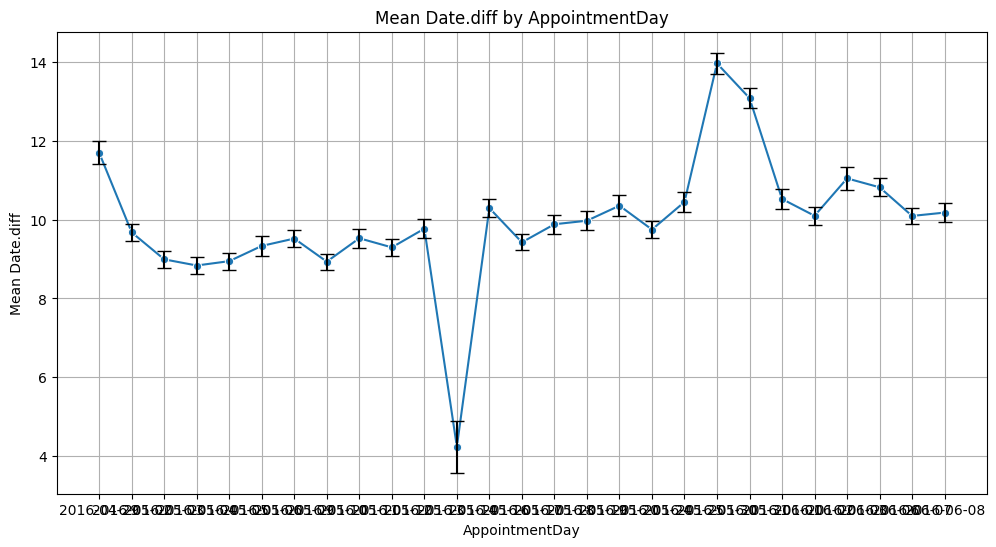

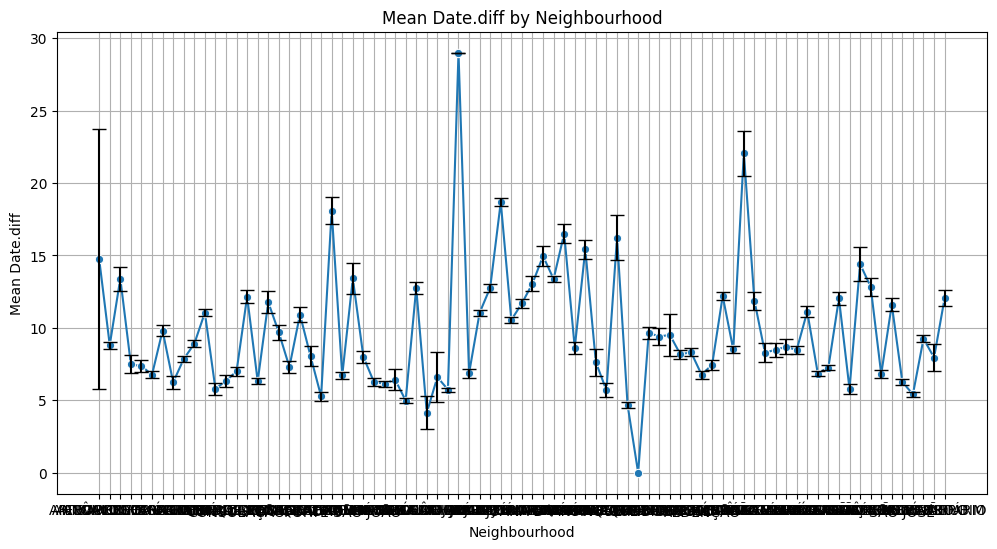

In [76]:
for num_col, cat_col in product(num_cols, cat_cols):
    # Calculate mean and standard deviation
    summary = data.groupby(cat_col).agg(
        mean_value=(num_col, 'mean'),
        std_value=(num_col, 'std'),
        count=(num_col, 'size')
    ).reset_index()
    summary['std_error'] = summary['std_value'] / summary['count']**0.5
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=summary, x=cat_col, y='mean_value', marker='o')
    plt.errorbar(x=summary[cat_col],
                 y=summary['mean_value'],
                 yerr=summary['std_error'],
                 fmt='none',
                 c='black',
                 capsize=5)
    plt.title(f'Mean {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(f'Mean {num_col}')
    plt.grid()
    plt.show()

In [77]:
SAMPLE_SIZE_THRESHOLD = 30
SIGNIFICANCE_LEVEL = 0.05
# Replace `data` with your actual DataFrame
for cat_col, num_col in product(cat_cols, num_cols):
    filtered_data = data[[cat_col, num_col]].dropna()
    groups = filtered_data.groupby(cat_col)[num_col]
    unique_categories = filtered_data[cat_col].unique()
    if len(unique_categories) < 2:
        print(f"Skipping {cat_col} - {num_col}: Less than two categories")
        continue
    if len(unique_categories) == 2:
        group1 = groups.get_group(unique_categories[0])
        group2 = groups.get_group(unique_categories[1])
        if len(group1) > SAMPLE_SIZE_THRESHOLD and len(group2) > SAMPLE_SIZE_THRESHOLD:
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "Z-test (T-test approximation)"
        else:
            # Perform T-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "T-test"

        # Print results
        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        # Significance test
        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")
    else:
        category_data = [group for _, group in groups]
        stat, p_value = stats.f_oneway(*category_data)
        test_type = "ANOVA"

        print(f"{test_type} between {cat_col} and {num_col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")

        if p_value < SIGNIFICANCE_LEVEL:
            print(f"Reject the null hypothesis (p-value < {SIGNIFICANCE_LEVEL})")
        else:
            print(f"Fail to reject the null hypothesis (p-value >= {SIGNIFICANCE_LEVEL})")

    print("\n")

Z-test (T-test approximation) between Gender and PatientId:
Statistic: -3.3960, p-value: 0.0007
Reject the null hypothesis (p-value < 0.05)


Z-test (T-test approximation) between Gender and AppointmentID:
Statistic: -6.7990, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


Z-test (T-test approximation) between Gender and Age:
Statistic: 29.9763, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


Z-test (T-test approximation) between Gender and Date.diff:
Statistic: 10.1317, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between ScheduledDay and PatientId:
Statistic: 1.1159, p-value: 0.1925
Fail to reject the null hypothesis (p-value >= 0.05)


ANOVA between ScheduledDay and AppointmentID:
Statistic: 1636592.4108, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between ScheduledDay and Age:
Statistic: 10.5710, p-value: 0.0000
Reject the null hypothesis (p-value < 0.05)


ANOVA between ScheduledDay and Date.diff:
Statistic


# INSIGHTS
(i) Relationships Between Numerical Variables

Age vs. No-Show Status:Analyzing whether older or younger patients are more likely to miss appointments can help in targeted interventions.
If elderly patients have a higher no-show rate, hospitals might prioritize reminders for this age group.

Appointment Scheduling Gap vs. No-Show Status: Patients who book appointments too far in advance may have a higher no-show rate.
A potential trend might show that shorter appointment gaps lead to better attendance.

(ii) Relationships Between Categorical & Numerical Variables

Day of the Week vs. No-Shows:Certain days might have higher no-show rates due to work schedules, cultural preferences, or other social factors.If weekends have fewer no-shows, hospitals might consider scheduling more appointments on these days.

Medical Conditions vs. No-Shows:Patients with chronic conditions like diabetes or hypertension may be more likely to attend appointments due to the necessity of follow-ups.Conversely, patients with fewer health complications may be more prone to missing appointments.

(iii) Relationships Between Categorical Variables

Gender vs. No-Show Status:If one gender has a higher tendency to miss appointments, hospitals may consider customized appointment reminders (e.g., SMS, phone calls, or emails).

Medical History vs. Appointment Attendance:If patients with previous missed appointments continue to miss future ones, they may require special interventions like personalized follow-up calls.

Cleaning

<Axes: xlabel='AppointmentID'>

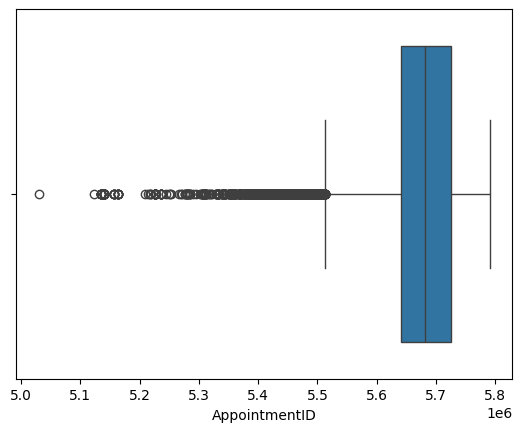

In [78]:
# check for outliers
sns.boxplot(data=data,x="AppointmentID")

In [79]:
# Calculate Q1  and Q3
Q1 = data['AppointmentID'].quantile(0.25)
Q3 = data['AppointmentID'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data_filtered = data[(data['AppointmentID'] >= lower_bound) & (data['AppointmentID'] <= upper_bound)]

# print the number of rows before and after
print(f'Original data size: {data.shape[0]}')
print(f'Filtered data size: {data_filtered.shape[0]}')

Original data size: 106987
Filtered data size: 104119


Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder
le_ScheduledDay = LabelEncoder()
le_Neighbourhood = LabelEncoder()
data['ScheduledDay_encoded'] = le_ScheduledDay.fit_transform(data['ScheduledDay'])
data['Neighbourhood'] = le_Neighbourhood.fit_transform(data['Neighbourhood'])
data = data.drop(columns=['ScheduledDay', 'Neighbourhood'])
print(data)

           PatientId  AppointmentID Gender AppointmentDay   Age  Scholarship  \
0       2.987250e+13        5642903      F     2016-04-29  62.0        False   
1       5.589978e+14        5642503      M     2016-04-29  56.0        False   
2       4.262962e+12        5642549      F     2016-04-29  62.0        False   
3       8.679512e+11        5642828      F     2016-04-29   8.0        False   
4       8.841186e+12        5642494      F     2016-04-29  56.0        False   
...              ...            ...    ...            ...   ...          ...   
106982  2.572134e+12        5651768      F     2016-06-07  56.0        False   
106983  3.596266e+12        5650093      F     2016-06-07  51.0        False   
106984  1.557663e+13        5630692      F     2016-06-07  21.0        False   
106985  9.213493e+13        5630323      F     2016-06-07  38.0        False   
106986  3.775115e+14        5629448      F     2016-06-07  54.0        False   

        Hipertension  Diabetes  Alcohol

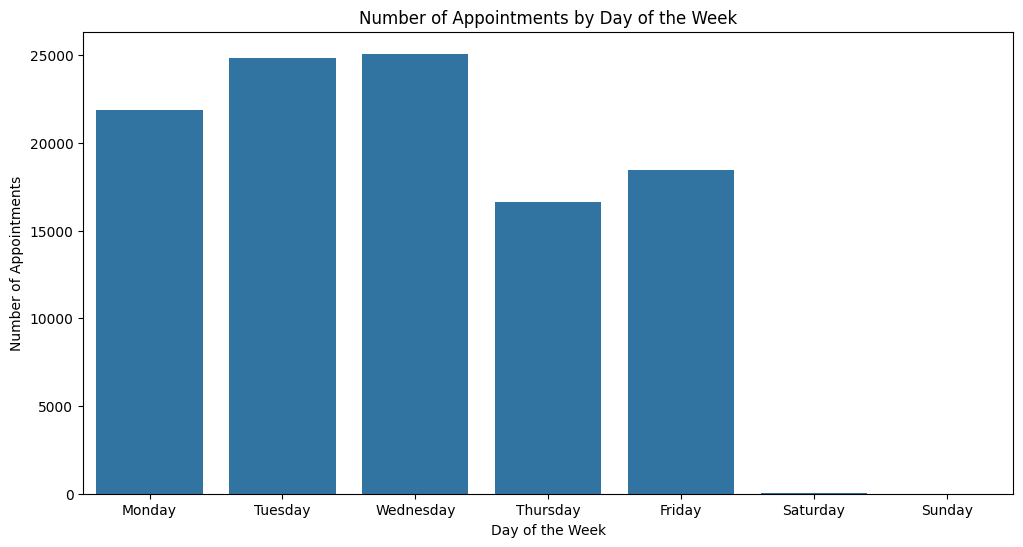

In [81]:
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['Day_of_Week'] = data['AppointmentDay'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Appointments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Appointments')
plt.show()

# CONCLUSION
*   Certain age groups and patient demographics are more likely to miss appointments.
*   Longer appointment booking gaps may contribute to increased no-show rates.
*   Patients with chronic medical conditions tend to have higher appointment adherence, while others might skip appointments.
*   Gender differences, weekdays, and medical history play a role in no-show behavior.



